---

# MATH 215 Python Assignment 2

## Instructions

* Enter your solutions in cells with `YOUR CODE HERE` (all other cells are ignored by the autograder)
* Run the tests to verify your work (and note some cells contain hidden tests)
* Hidden tests only run during autograding
* Do not import any pacakges (other than the standard packages in the cell below)
* See [Python for UBC Math](https://ubcmath.github.io/python/) for instructions and examples
* Submit the completed notebook to Canvas (download `.ipynb` file to your machine and then upload to Canvas)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

The function `odeEuler` takes a Python function `f`, a vector `t` and initial value `y0` and returns the vector `y` of approximations $y_n \approx y(t_n)$ computed by Euler's method:

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n)
$$

Note:

* function `f` represents the right hand side of the first order differential equation $y' = f(t,y)$
* first entry of vector `t` is the value $t_0$
* first entry of vector `y` is the value $y_0$
* vectors `t` and `y` are the same length
* entry of `y` at index `n` is the approximation $y_n \approx y(t_n)$

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

For example, approximate the solution of $y' = -ty$, $y(0)=1$ over the interval from $t_0 = 0$ to $t_f = 4$ with $N=20$ iterations of Euler's method with step size $h = (4-0)/20 = 0.2$. Plot the approximation with the exact solution $y(t) = e^{-t^2/2}$.

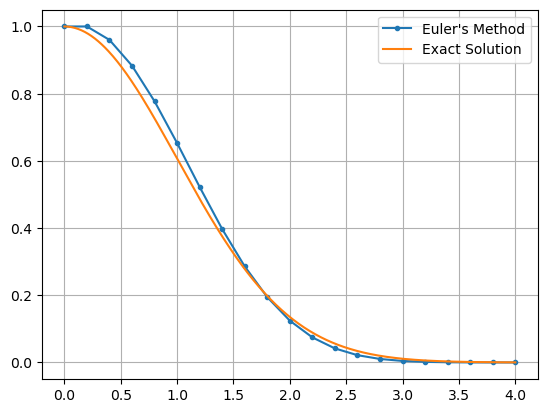

In [3]:
t0 = 0; tf = 4; N = 20; h = (tf - t0)/N;

f = lambda t,y: -t*y
t = np.linspace(t0,tf,N+1)
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,".-",label="Euler's Method")

texact = np.linspace(t0,tf,(tf-t0)*100)
yexact = np.exp(-texact**2/2)
plt.plot(texact,yexact,label="Exact Solution")

plt.grid(True), plt.legend()
plt.show()

See [Python for UBC Math > Euler's Method](https://ubcmath.github.io/python/differential-equations/eulers-method.html) for more information.

## Problem 1 (5 marks)

Consider the equation $y' = y$, $y(0)=1$. The exact solution is $y(t) = e^t$. Complete the code below to implement Euler's method from $t_0 = 0$ to $t_f = 2$ with step size $h=2^{-k}$ where $k$ is the smallest positive integer such that the error at $t_f=2$ is less than $0.1$. Note that if $h=2^{-k}$ then $N=2^{k+1}$ in this case. Save the value $k$ as `k_1`.

Note: We append `_1` to all the variable names to distinguish the variables used in Problem 1 from variables in other problems.

Step size h: 0.0078125
Error at t = 2: 0.0572055001896139


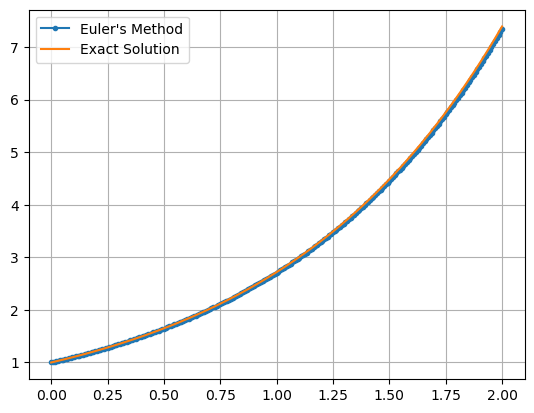

In [4]:
# YOUR CODE HERE

t0_1 = 0
tf_1 = 2
k_1 = 7
N_1 = 2**(k_1 + 1)
h_1 = (tf_1 - t0_1)/N_1;

f_1 = lambda t,y: y
t_1 = np.linspace(t0_1,tf_1,N_1 + 1)
y0_1 = 1
y_1 = odeEuler(f_1,t_1,y0_1)
plt.plot(t_1,y_1,".-",label="Euler's Method")

texact_1 = np.linspace(t0_1,tf_1,(tf_1 - t0_1)*100)
yexact_1 = np.exp(texact_1)
plt.plot(texact_1,yexact_1,label="Exact Solution")

print("Step size h:",h_1)
print("Error at t = 2:",abs(y_1[-1] - yexact_1[-1]))
plt.grid(True), plt.legend()
plt.show()

In [41]:
# Test 1: Check if k_1 is defined as an integer. (1 mark)
assert isinstance(k_1,int) , "k_1 should be an integer."
print("Problem 1 Test 1: Success!")

Problem 1 Test 1: Success!


In [42]:
# Test 2: Check if first entry of t_1 is 0 and last entry is 2. (1 mark)
assert np.allclose(t_1[0],0) , "First entry of t_1 should be 0."
assert np.allclose(t_1[-1],2) , "Last entry of t_1 should be 2."
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


In [43]:
# Test 3: Check if first entry of y_1 is 1 and length of y_1 is length of t_1. (1 mark)
assert np.allclose(y_1[0],1) , "First entry of y_1 should be 1."
assert len(t_1) == len(y_1) , "Vectors y_1 and t_1 should be the same length."
print("Problem 1 Test 3: Success!")

Problem 1 Test 3: Success!


In [44]:
# Test 4: Check if error at tf = 2 is less than 0.1. (1 mark)
assert abs(y_1[-1] - yexact_1[-1]) < 0.1 ,  "Error should be less than 0.1."
print("Problem 1 Test 4: Success!")

Problem 1 Test 4: Success!


In [45]:
# Test 5: Check if k_1 is the correct value. This cell contains hidden tests for grading. (1 mark)

## Problem 2 (5 marks)

Approximate the solution of $y' = t - y^2$, $y(0)=2$, over the interval $0 \leq t \leq 5$ using $N=100$ iterations of Euler's method. Save the vector of $t$ values as `t_2` and the vector of $y$ values as `y_2`.

Note: We append `_2` to all the variable names to distinguish the variables used in Problem 2 from variables in other problems.

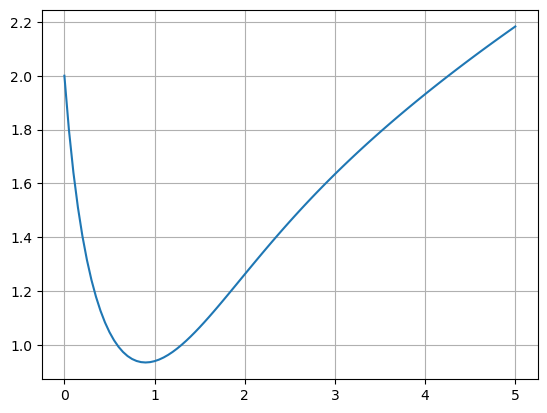

In [65]:
# YOUR CODE HERE
t0_2 = 0
tf_2 = 5
N_2 = 100
f_2 = lambda t,y: t-y**2
t_2 = np.linspace(t0_2,tf_2,N_2 + 1)
y0_2 = 2
y_2 = odeEuler(f_2,t_2,y0_2)
plt.plot(t_2,y_2)
plt.grid(True)
plt.show()

In [66]:
# Test 1: Check if t_2 is an array of length 101. (1 mark)
assert isinstance(t_2,np.ndarray) , "t_2 should be a NumPy array."
assert len(t_2) == 101 , "t_2 should be length 101."
print("Problem 2 Test 1: Success!")

Problem 2 Test 1: Success!


In [67]:
# Test 2: Check if t_2 starts with 0 and ends with 2. (1 mark)
assert np.allclose(t_2[0],0) , "First entry of t_2 should be 0."
assert np.allclose(t_2[-1],5) , "Last entry of t_2 should be 5."
print("Problem 2 Test 2: Success!")

Problem 2 Test 2: Success!


In [68]:
# Test 3: Check if y_2 is an array of length 101. (1 mark)
assert isinstance(y_2,np.ndarray) , "y_2 should be a NumPy array."
assert len(y_2) == 101 , "y_2 should be length 101."
print("Problem 2 Test 3: Success!")

Problem 2 Test 3: Success!


In [69]:
# Test 4: Check if y_2 starts with 2 and ends with 2.1829670566456554. (1 mark)
assert np.allclose(y_2[0],2) , "First entry to y_2 should be 2."
assert np.allclose(y_2[-1],2.1829670566456554) , "Last entry of y_2 should be close to 2.1829670566456554."
print("Problem 2 Test 4: Success!")

Problem 2 Test 4: Success!


In [70]:
# Test 5: Check if y_2 has correct values. This cell contains hidden tests for grading. (1 mark)

## Problem 3 (2 marks)

Consider again the differential equation from the previous question $y' = t - y^2$. The equation is neither linear nor separable therefore we do not have any methods to find solutions analytically. But we can *always* use Euler's method to approximate. Approximate solutions for different initial values $y(0) > 0$ and observe the output.

Determine whether the following statement is **True** or **False**:

If $y_1(t)$ and $y_2(t)$ are any solutions of $y' = t-y^2$ such that $y_1(0)>0$ and $y_2(0)>0$ then $\displaystyle \lim_{t \to \infty} \left( y_1(t) - y_2(t) \right) = 0$.

Save your response (**True** or **False**) as `observation3`.

In [71]:
# YOUR CODE HERE
observation3 = True

In [72]:
# Test 1: Check if observation3 is True or False. (1 mark)
assert isinstance(observation3,bool) , "observation3 should be True or False."
print("Problem 3 Test 1: Success!")

Problem 3 Test 1: Success!


In [73]:
# Test 2: Check if observation3 is correct value. This cell contains hidden tests. (1 mark)

## Problem 4 (4 marks)

Approximate the solution of $y' = -y^2 \sin(\pi t)$, $y(0)=1$, over the interval $0 \leq t \leq 3$ using Euler's method. This is a separable equation therefore we can find the exat solution. Use separation of variables to compute the exact solution and enter the expression as `yexact_4` (using `texact_4` in the expression for the variable $t$). Use enough iterations such that the error at $t=3$ is less than 0.05. Save the vector of $t$ values as `t_4` and the vector of $y$ values as `y_4`.

Note: We append `_4` to all the variable names to distinguish the variables used in Problem 4 from variables in other problems.

Error at t = 3: 0.03859865916297511


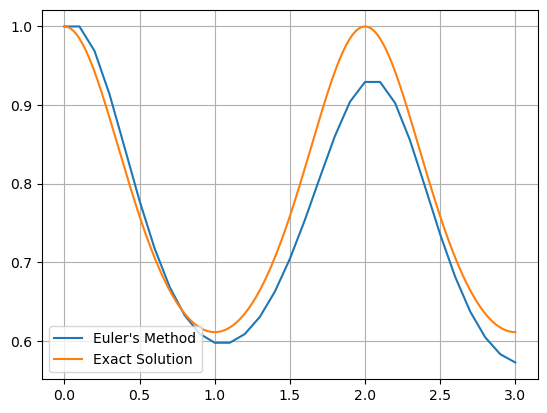

In [80]:
# YOUR CODE HERE
t0_4 = 0
tf_4 = 3
N_4 = 30
f_4 = lambda t,y: -y**2*np.sin(np.pi*t)
t_4 = np.linspace(t0_4,tf_4,N_4 + 1)
y0_4 = 1
y_4 = odeEuler(f_4,t_4,y0_4)
plt.plot(t_4,y_4,label="Euler's Method")

texact_4 = np.linspace(t0_4,tf_4,(tf_4 - t0_4)*100)
yexact_4 = 1 / (((-np.cos(np.pi*texact_4))/np.pi) + 1 + 1/np.pi)
plt.plot(texact_4,yexact_4,label="Exact Solution")

print("Error at t = 3:",abs(y_4[-1] - yexact_4[-1]))
plt.grid(True), plt.legend()
plt.show()

In [81]:
# Test 1: Check if first entry of t_4 is 0 and last entry is 3. (1 mark)
assert np.allclose(t_4[0],0) , "First entry of t_4 should be 0."
assert np.allclose(t_4[-1],3) , "Last entry of t_4 should be 3."
print("Problem 4 Test 1: Success!")

Problem 4 Test 1: Success!


In [82]:
# Test 2: Check if first entry of y_4 is 1 and length of y_4 is length of t_4. (1 mark)
assert np.allclose(y_4[0],1) , "First entry of y_4 should be 1."
assert len(t_4) == len(y_4) , "Vectors y_1 and t_4 should be the same length."
print("Problem 1 Test 2: Success!")

Problem 1 Test 2: Success!


In [83]:
# Test 3: Check if error at tf = 3 is less than 0.05. (2 marks)
assert abs(y_4[-1] - 0.6110154703516573) < 0.05 ,  "Error should be less than 0.05."
print("Problem 1 Test 3: Success!")

Problem 1 Test 3: Success!
